# Data Preparation Week 9 and 10
## Joshua Greenert
## DSC540-T301 Data Preparation
## 10/28/2022

## Data Wrangling with Python Activity 9

In [1]:
# Import the required libraries.
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup
import re
import ssl
import urllib.request, urllib.parse, urllib.error
import requests

In [2]:
# Check the SSL cert.
ctx = ssl.create_default_context()
ctx.check_hostname = False
ctx.verify_mode = ssl.CERT_NONE

In [3]:
# Read the HTML from the url
top100url = 'https://www.gutenberg.org/browse/scores/top'
response = requests.get(top100url)

In [4]:
# Write a small function to check the status of the web request.
def check_status(response):
    if response.status_code == 200:
        print("Success!")
    else:
        print("Failed!")

check_status(response)

Success!


In [5]:
# Decode the response and pass this on to Beautiful Soup for HTML parsing.
content = response.content.decode(response.encoding)
soup = BeautifulSoup(content, 'html.parser')

In [6]:
# Find all the href tags and store them in the list of links.  Print the first 30 elements.
href_links = []

# Loop through the soup to get the links.
for i in soup.find_all('a'):
    href_links.append(i.get('href'))
    
href_links[:30]

['/',
 '/about/',
 '/about/',
 '/policy/collection_development.html',
 '/about/contact_information.html',
 '/about/background/',
 '/policy/permission.html',
 '/policy/privacy_policy.html',
 '/policy/terms_of_use.html',
 '/ebooks/',
 '/ebooks/',
 '/ebooks/bookshelf/',
 '/browse/scores/top',
 '/ebooks/offline_catalogs.html',
 '/help/',
 '/help/',
 '/help/copyright.html',
 '/help/errata.html',
 '/help/file_formats.html',
 '/help/faq.html',
 '/policy/',
 '/help/public_domain_ebook_submission.html',
 '/help/submitting_your_own_work.html',
 '/help/mobile.html',
 '/attic/',
 '/donate/',
 '/donate/',
 '#books-last1',
 '#authors-last1',
 '#books-last7']

In [7]:
# Use a regular expression to find the numeric digits in the links.  These are the file number for top 100 ebooks.
books = []

In [8]:
# Initialize the empty list to hold the file numbers and use regex to find the numeric digits in the link href string.
# Use the findall method.
for i in range(19, 119):
    
    # Get the link and strip it.
    book = href_links[i]
    book = book.strip()
    
    # Use regular expression to find digits.
    count = re.findall('[0-9]+', book)
    
    # If there are digits in the book, add it to the list.
    if(len(count) == 1):
        books.append(int(count[0]))
        
books

[1,
 1,
 7,
 7,
 30,
 30,
 2641,
 145,
 37106,
 16389,
 67979,
 6761,
 100,
 394,
 2701,
 2160,
 4085,
 6593,
 5197,
 1259,
 1342,
 84,
 1661,
 41,
 345,
 20228,
 11,
 69257,
 1232,
 98,
 786,
 69254,
 174,
 25344,
 4300,
 1952,
 2591,
 69258,
 69260,
 69253,
 46,
 69252,
 69255,
 2600,
 1184,
 2554,
 1080,
 76,
 43,
 5200,
 69251,
 64317,
 1400,
 1260,
 42108,
 158,
 2542,
 30254,
 6130,
 74,
 844,
 69256,
 43453,
 48320,
 135,
 28054,
 33283,
 34632,
 996,
 58585,
 205,
 408,
 120,
 45,
 236,
 27827,
 514,
 768,
 4363,
 1399,
 5740,
 244,
 1497,
 3206,
 3207,
 69250,
 1998,
 203,
 3600,
 852,
 2148,
 16]

In [9]:
# What does the soup object's text look like?  Use the .text method and print only the first 2,000 characters 
# (not the whole string)
print(soup.text[:2000])





Top 100 | Project Gutenberg



























Menu▾



About
          ▾

▾


About Project Gutenberg
Collection Development
Contact Us
History & Philosophy
Permissions & License
Privacy Policy
Terms of Use



Search and Browse
      	  ▾

▾


Book Search
Bookshelves
Frequently Downloaded
Offline Catalogs



Help
          ▾

▾


All help topics →
Copyright Procedures
Errata, Fixes and Bug Reports
File Formats
Frequently Asked Questions
Policies →
Public Domain eBook Submission
Submitting Your Own Work
Tablets, Phones and eReaders
The Attic →


Donate










Donation







Frequently Viewed or Downloaded
These listings are based on the number of times each eBook gets downloaded.
      Multiple downloads from the same Internet address on the same day count as one download, and addresses that download more than 100 eBooks in a day are considered robots and are not counted.

Downloaded Books
2022-10-29220659
last 7 days1779223
last 30 days7075711



Top 100 EBooks yesterd

In [10]:
# Search in the extracted text from the soup object to find the names of the top 100 ebooks.
book_titles = []

In [11]:
# Create a starting index.  It should point at the text top 100 ebooks yesterday.  Use the splitlines method of soup.text
# It splits the lines of text of the soup object.
index = soup.text.splitlines().index('Top 100 EBooks yesterday')

In [12]:
# Loop 1 - 100 to add the strings of the next 100 lines to this temporary list.
# Hint: use the splitlines method.
for i in range(100):
    book_titles.append(soup.text.splitlines()[index + 10 + i])

In [13]:
# Use a regular expression to extract only text from the name strings and append it to an empty list.
# Use match and span to find the indcies and use them.
top_100_list = []

# Loop through the objects collected and strip the book titles using regex.
for i in range(100):
    index1, index2 = re.match('^[a-zA-Z ]*', book_titles[i]).span()
    top_100_list.append(book_titles[i][index1:index2])
    
top_100_list

['A Room with a View by E',
 'Middlemarch by George Eliot ',
 'Little Women',
 'The Enchanted April by Elizabeth Von Arnim ',
 'The Blue Castle',
 'The Adventures of Ferdinand Count Fathom ',
 'The Complete Works of William Shakespeare by William Shakespeare ',
 'Cranford by Elizabeth Cleghorn Gaskell ',
 'Moby Dick',
 'The Expedition of Humphry Clinker by T',
 'The Adventures of Roderick Random by T',
 'History of Tom Jones',
 'My Life ',
 'Twenty Years After by Alexandre Dumas ',
 'Pride and Prejudice by Jane Austen ',
 'Frankenstein',
 'The Adventures of Sherlock Holmes by Arthur Conan Doyle ',
 'The Legend of Sleepy Hollow by Washington Irving ',
 'Dracula by Bram Stoker ',
 'Noli Me Tangere by Jos',
 'Alice',
 'Time out for redheads by Miriam Allen De Ford ',
 'The Prince by Niccol',
 'A Tale of Two Cities by Charles Dickens ',
 'Hard Times by Charles Dickens ',
 'The vortex blaster makes war by E',
 'The Picture of Dorian Gray by Oscar Wilde ',
 'The Scarlet Letter by Nathaniel H

## Data Wrangling with Python Activity 10

In [14]:
# Import the required libraries.
import json


In [15]:
# Load the secret API key using json.loads.
# https://www.omdbapi.com/?t=titanic&apikey=apikey
with open('APIkey.json') as f:
    keys = json.load(f)
    omdbapi = keys['OMDBapi']

In [16]:
# Assign the OMDB portal (http://www.omdbapi.com/?) as a string to a variable.
websiteurl = 'http://www.omdbapi.com/?'
apikey = '&apikey=' + omdbapi

In [17]:
# Write a utility function called print_json to print the movie data from a json file (from the portal)
def print_json(json_data):
    list_keys=['Title', 'Year', 'Rated', 'Released', 'Runtime', 'Genre', 'Director', 'Writer', 
               'Actors', 'Plot', 'Language', 'Country', 'Awards', 'Ratings', 
               'Metascore', 'imdbRating', 'imdbVotes', 'imdbID']
    
    # loop through each key to get the value and print it for the user.
    for j in list_keys:
        if j in json_data.keys():
            print(f"{j}: {json_data[j]}")

In [18]:
# Write a utility function to download a poster of the movie based on the information from the json dataset and save it
# in your local folder.  Use the os module.  The poster data is stored in the json key poster.  Use the python command
# to open a file and write the poster data.  Close the file after you're done (save as image file)
def save_poster(json_data):
    import os 
    
    # Get the poster url and the title of the movie to save.
    title = str(json_data['Title']) 
    poster_url = json_data['Poster']
    
    # Use the poster url to get the file type (jpeg, jpg, etc.)
    poster_type = poster_url.split('.')[-1]
    
    # Save the data for the image.
    poster_data = urllib.request.urlopen(poster_url).read()
    
    # Set the save location.
    savelocation = os.getcwd() + '\\' + 'Posters' + '\\'
    
    # If the directory doesn't exist, make it.
    if not os.path.isdir(savelocation):
        os.mkdir(savelocation)
        
    # Create the file and save the poster data to it.
    filename = savelocation + title + '.' + poster_type
    
    file = open(filename, 'wb')
    file.write(poster_data)
    file.close()

In [19]:
# Write a utility function called search_movie to search for a movie by its name, print the downloaded json data, and save
# the movie poster in the local folder.  Use a try-except loop for this.  Use the previously created serviceurl and apikey
# variables.  You have to pass on a dictionary with a key, t, and the movie name as the corresponding value to the 
# urlencode() function and then add the serviceurl and apikey to the output of the function to construct the full url.  This
# url will be used to access the data.  The json data has a key called response.  If it is true, that means the read was
# successful.  Check this before processing the data.  If it's not successful, print the json key error, which will contain
# the appropriate error message returned by the movie database.
def search_movie(title):
    try:
        # Set up the url for the request.
        url = websiteurl + urllib.parse.urlencode({'t': str(title)}) + apikey
        print(f'URL being retrieved: {url}')
        
        # Request the data and set it into a json object.
        data_request = urllib.request.urlopen(url)
        data = data_request.read()
        json_data = json.loads(data)

        # Check if the response is true or false.
        if json_data['Response'] == 'True':
            print_json(json_data)
            
            # if the json returns with the poster data, save it.
            if json_data['Poster'] != 'N/A':
                save_poster(json_data)
        else:
            print(f"ERROR: {json_data['Error']}")
        
    except urllib.error.URLError as exception:
        print(f"ERROR: {exception.reason}")

In [20]:
# Test the search_movie function by entering Titanic.
search_movie("Titanic")

URL being retrieved: http://www.omdbapi.com/?t=Titanic&apikey=8200ded3
Title: Titanic
Year: 1997
Rated: PG-13
Released: 19 Dec 1997
Runtime: 194 min
Genre: Drama, Romance
Director: James Cameron
Writer: James Cameron
Actors: Leonardo DiCaprio, Kate Winslet, Billy Zane
Plot: A seventeen-year-old aristocrat falls in love with a kind but poor artist aboard the luxurious, ill-fated R.M.S. Titanic.
Language: English, Swedish, Italian, French
Country: United States, Mexico
Awards: Won 11 Oscars. 125 wins & 83 nominations total
Ratings: [{'Source': 'Internet Movie Database', 'Value': '7.9/10'}, {'Source': 'Rotten Tomatoes', 'Value': '87%'}, {'Source': 'Metacritic', 'Value': '75/100'}]
Metascore: 75
imdbRating: 7.9
imdbVotes: 1,159,706
imdbID: tt0120338


In [21]:
# Test the search_movie function by entering "Random_error"
search_movie("Random_error")

URL being retrieved: http://www.omdbapi.com/?t=Random_error&apikey=8200ded3
ERROR: Movie not found!


## Connect to Twitter Sample

In [22]:
import requests
import os
import json

# Set up the api connection
bearer_token = "AAAAAAAAAAAAAAAAAAAAAH3HigEAAAAApWixubJom%2BYZEQQLNmjlPP7mMXE%3Drfuw5ezx3wgBGUeqHlYRXv3LLlVGb5fKOPhll0BdG3iJOTrGm0"

# Set up url and query parameters.
search_url = "https://api.twitter.com/2/tweets/search/recent"
query_params = {'query': '#bellevue OR #datascience','tweet.fields': 'author_id'}

# Set the headers for the bearer token.
def bearer_oauth(r):
    r.headers["Authorization"] = f"Bearer {bearer_token}"
    r.headers["User-Agent"] = "v2RecentSearchPython"
    return r

# Connect to the search endpoint and to return data.
def connect_to_endpoint(url, params):
    response = requests.get(url, auth=bearer_oauth, params=params)
    if response.status_code != 200:
        raise Exception(response.status_code, response.text)
    return response.json()

# Get the response.
json_response = connect_to_endpoint(search_url, query_params)
json_data = json.dumps(json_response)

# Parse the response and print the author id and text.
for val in json_response["data"]:
    print(f'\nAuthor ID: {val["author_id"]}\nText: {val["text"].strip()}')
    


Author ID: 1532462338066071553
Text: Hmu for Excel assignments and projects
#ArtificialIntelligence #AI #ML #DataScience #DataScientists #CodeNewbies #Tech #deeplearning #CyberSecurity #Python #Coding  #javascript #rstats #100DaysOfCode #programming #Linux #IoT #IIoT #BigData https://t.co/TfGtobh8Hi

Author ID: 1409076550675357699
Text: RT @Jessiessays: Guaranteed A's in:
#Essays
#Exams
#Sociology
#Thesis
#Assignment
#Homework
#Stats
#Term paper
#Research
PHYSICS
Chemistry…

Author ID: 1468965221091790854
Text: RT @Eli_Krumova: #MachineLearning @Raspberry_Pi (Includes #Python Libraries)
https://t.co/pEqD2pR0Ks

v/@SourabhSKatoch
#DataScience #Analy…

Author ID: 1563624025619718144
Text: Buy Facebook Page Reviews
#MachineLearning  #DataScience #5G #100DaysOfCode #Python #smmusashop #BigData #AI #IoT #DeepLearning #ArtificialIntelligence #NLP 
#Industry40 #tech #DEVCommunity #javascript30
https://t.co/e0FtyeUHXp

Author ID: 1276058041389953024
Text: RT @NehaAktar12: Buy Google Voice Acc

## Visualizations

In [107]:
# Using one of the datasets provided in Weeks 7 & 8, or a dataset of your own, choose 3 of the following visualizations 
# to complete. You must submit via PDF along with your code. You are free to use Matplotlib, Seaborn or another package 
# if you prefer. (line, bar, scatter, histogram, density plot, pie chart)
import matplotlib.pyplot as plt

# Create the dataframe.
df_candy = pd.read_csv('candyhierarchy2017.csv',  encoding = "ISO-8859-1")

# Replace values with mode for all categorical columns.
categorical_columns = df_candy.select_dtypes( include ='object').columns
df_candy[categorical_columns] = df_candy[categorical_columns].apply(lambda x: x.fillna(x.value_counts().index[0]))

columns_to_drop = ['Q12: MEDIA [Daily Dish]','Q12: MEDIA [ESPN]', 'Q12: MEDIA [Yahoo]' ]
df_candy = df_candy.drop(columns_to_drop, axis=1)

In [108]:
# Create a dataframe to chart the data.
df_age = df_candy[['Internal ID', 'Q3: AGE','Click Coordinates (x, y)' ]]
df_gender = df_candy[['Internal ID','Q2: GENDER']]
df_age_gender = pd.merge(df_age, df_gender)

# Get the median age set to a value and update all values 
median_age = 0
count_age = 0
total_age = 0

# Drop the columns for age that don't have values.
for i, row in df_age_gender.iterrows():
    try:
        age = row['Q3: AGE']
        if(age.isdigit()):
            count_age = count_age + 1
            total_age = total_age + int(age)
    except: 
        print(age)
        
# Set the median age.
median_age = int(total_age / count_age)

# Loop through and update the median age for users that entered more than 100 or users who entered text.
for i, row in df_age_gender.iterrows():
    try:
        age = row['Q3: AGE']
        if(age.isdigit() and int(age) < 100):
            continue
        else:
            df_age_gender.at[i,'Q3: AGE'] = median_age
    
    except ValueError: 
        df_age_gender.at[i,'Q3: AGE'] = median_age

df_age_gender['Q3: AGE'] = df_age_gender['Q3: AGE'].astype('int')

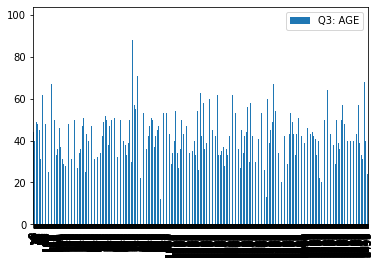

In [109]:
# Chart the data with a bar chart.
ax = df_age_gender.plot.bar(y="Q3: AGE")

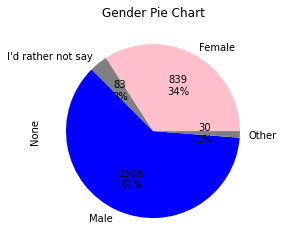

In [110]:
# Create a gender pie chart.
# Define a function to return the value of each categorical value
def label_function(val):
    return f'{val / 100 * len(df_age_gender):.0f}\n{val:.0f}%'

# Group by gender and set the plot to ax2
df_age_gender.groupby('Q2: GENDER').size().plot(kind='pie', autopct=label_function, textprops={'fontsize': 10},
                                 colors=['pink', 'grey', 'blue', 'grey'])

# Set the plot data and show it.
plt.title("Gender Pie Chart")
plt.show()

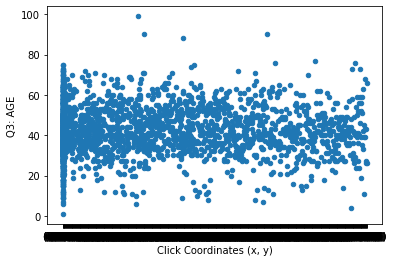

In [112]:
# Create a scatter plot for the coordinates by country
# Clean the country column to ensure that the data is comparable.
ax = df_age_gender.plot.scatter(x = "Click Coordinates (x, y)", y="Q3: AGE")